<a href="https://colab.research.google.com/github/OlandezVoador/SI_atividades/blob/gold/EC_1_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Felipe Banes Lopes Ferreira

#### RA

21076215

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
digits_dataset = load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [42]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [41]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [6]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [7]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

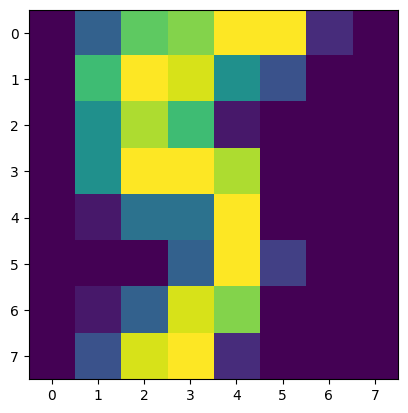

In [8]:
plt.imshow(digits_img[15])

In [9]:
import numpy as np

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [55]:
digits_img=digits_img.reshape(digits_img.shape[0], - 1)

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [56]:
digits_img.shape

(1797, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [57]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [58]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [59]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [60]:
from sklearn.model_selection import train_test_split as teste

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [61]:
x_train, x_test, y_train, y_test = teste(digits_img, digits_target, test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [62]:
print(x_train)

[[ 0.  0. 11. ... 13. 16.  7.]
 [ 0.  0.  4. ...  9.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ... 11.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [63]:
print(y_train)

[2 9 9 ... 9 4 4]


In [64]:
print(x_test)

[[ 0.  0.  4. ...  5.  0.  0.]
 [ 0.  0.  3. ... 15.  7.  0.]
 [ 0.  2. 14. ...  2.  0.  0.]
 ...
 [ 0.  0.  5. ... 16.  2.  0.]
 [ 0.  4. 15. ... 16.  9.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]]


In [65]:
print(y_test)

[8 6 3 5 6 7 1 7 8 9 0 5 4 7 4 0 8 7 2 6 7 6 3 7 4 6 1 0 0 3 0 0 0 9 1 8 5
 2 5 3 7 4 4 6 5 4 2 1 1 5 5 2 3 6 2 7 9 7 1 4 3 0 1 9 4 0 3 9 3 2 6 8 7 0
 7 5 3 1 2 9 9 1 0 7 5 8 0 7 6 5 9 1 3 1 6 6 6 1 1 1 0 1 9 9 1 1 5 0 5 7 9
 0 2 5 4 9 8 3 4 5 3 7 8 0 2 7 9 8 0 4 8 0 6 9 0 5 7 1 0 2 7 3 2 4 7 6 5 2
 9 6 4 8 9 6 2 7 7 4 8 4 8 2 1 9 7 8 3 8 6 4 7 1 5 1 8 2 1 3 6 2 3 5 8 2 2
 7 8 7 1 4 8 6 2 0 3 4 1 5 8 6 6 0 0 4 7 6 4 2 3 4 0 6 4 8 9 7 6 3 0 0 2 8
 4 8 7 4 4 9 4 6 9 9 8 0 4 6 4 5 7 7 3 7 4 1 2 2 4 9 8 7 7 0 1 0 4 2 4 8 0
 5 7 9 8 9 8 2 2 7 0 1 6 1 0 5 4 9 2 5 6 9 9 3 3 5 2 4 6 6 5 1 7 3 5 4 2 3
 8 9 5 6 4 6 7 0 9 4 6 1 4 9 8 8 9 4 7 6 8 1 8 8 0 7 3 5 2 9 0 6 2 5 9 7 6
 8 8 2 6 7 8 3 3 0 9 5 7 2 0 5 9 4 9 1 1 1 9 3 3 1 3 7 1 9 1 3 1 4 1 2 3 4
 5 7 3 1 3 0 3 4 6 4 3 0 3 3 7 6 9 6 7 3 6 9 4 4 8 4 9 5 9 2 3 6 0 4 4 8 3
 7 7 3 4 9 4 0 8 3 8 7 2 1 1 4 5 0 3 5 9 5 9 3 4 2 5 6 9 5 3 3 7 5 0 1 6 6
 1 8 1 9 2 7]


### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [66]:
from sklearn.neighbors import KNeighborsClassifier as classificador

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [67]:
# Vizinhos próximos a serem considerados
knn = classificador(n_neighbors=5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [70]:
# TREINAMENTO DO MODELO
knn = knn.fit(x_train,y_train)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [75]:
# ALGORITMO DE PREDIÇÃO DO MODELO TREINADO
y_pred = knn.predict(x_test)

numpy.ndarray

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [77]:
# Acurácia do classificador
from sklearn.metrics import accuracy_score

# Matriz de confusão
from sklearn.metrics import confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [81]:
precisao = accuracy_score(y_test,y_pred)
print(precisao)

0.9822222222222222


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [82]:
precisao = confusion_matrix(y_test,y_pred)
print(precisao)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  0  1  0  0]
 [ 0  0  0  0 51  0  0  2  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  2  0  0  0  0  0  0 40  0]
 [ 0  1  0  0  0  0  0  0  0 46]]


### Decision Tree

#### Treinamento

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [85]:
from sklearn.tree import DecisionTreeClassifier as dt

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [92]:
# TREINAMENTO DO MODELO
tree = dt()
tree = tree.fit(x_train,y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [93]:
# ALGORITMO DE PREDIÇÃO DO MODELO TREINADO
y_pred = tree.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [94]:
precisao = accuracy_score(y_test,y_pred)
print(precisao)

0.8511111111111112


Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [95]:
precisao = confusion_matrix(y_test,y_pred)
print(precisao)

[[42  0  0  0  0  1  0  0  0  0]
 [ 0 36  1  1  2  1  1  0  2  1]
 [ 0  2 35  0  0  0  0  1  0  0]
 [ 0  1  3 35  0  2  0  1  3  2]
 [ 0  4  0  0 44  0  0  3  0  2]
 [ 0  0  0  0  1 36  0  0  0  2]
 [ 1  0  1  0  3  0 40  0  0  0]
 [ 0  3  0  0  1  0  0 47  0  0]
 [ 2  5  3  3  0  0  0  0 28  1]
 [ 0  3  0  1  0  1  0  0  2 40]]


## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

ESCREVA AQUI A SUA RESPOSTA

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

ESCREVA AQUI A SUA RESPOSTA

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

ESCREVA AQUI A SUA RESPOSTA

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

ESCREVA AQUI A SUA RESPOSTA

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

ESCREVA AQUI A SUA RESPOSTA

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

ESCREVA AQUI A SUA RESPOSTA

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

ESCREVA AQUI A SUA RESPOSTA

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)